In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from scipy import stats

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the Census dataset
df = pd.read_csv("data_v2_master.csv")

### Exploring Data

In [3]:
# Display the first rows
df.head()

,ticker,year,marketcap,eps,earnings_rate,price,price_rate,pe_ratio,roe,sh_equity,sh_return,real_change
0,MSFT,2024,3002344,11.10,0.3087,403.98,0.2910,36.53,38.4,238268,0.81,NaN
1,MSFT,2023,2532081,9.72,0.2433,340.06,0.2760,34.99,38.2,206223,1.70,18.80
2,MSFT,2022,1920840,9.70,0.2450,256.25,0.2624,26.41,45.4,166542,1.79,32.71
3,MSFT,2021,2040304,8.12,0.2562,270.35,0.2821,33.30,46.2,141988,1.78,-5.21
4,MSFT,2020,1543306,5.82,0.1839,202.80,0.2657,34.85,39.5,118304,1.90,33.31


In [4]:
df.describe()

,year,marketcap,eps,earnings_rate,price,price_rate,pe_ratio,roe,sh_equity,sh_return,real_change
count,10699.000000,1.069900e+04,10699.000000,10699.000000,10699.000000,10699.000000,10699.000000,10699.000000,1.069900e+04,10699.000000,9960.000000
mean,2015.582578,4.036813e+04,49.507335,0.015157,93.499031,0.148931,17.714473,18.989935,3.164218e+05,1.615594,13.189968
std,5.516608,1.101373e+05,766.399127,3.880229,202.562390,0.141230,835.640064,282.700855,4.137570e+06,28.456432,37.043432
min,2001.000000,2.100000e+01,-756.850000,-87.312900,0.040000,-0.211900,-83386.780000,-6354.400000,-1.831600e+04,-1181.140000,-99.970000
25%,2011.000000,6.491000e+03,1.160000,-0.024750,27.315000,0.065300,12.390000,7.900000,1.696000e+03,0.150000,-7.092500
50%,2016.000000,1.488200e+04,2.640000,0.132000,51.610000,0.125900,18.850000,14.000000,4.846000e+03,2.460000,9.835000
75%,2020.000000,3.650900e+04,5.200000,0.298950,96.820000,0.201050,28.070000,23.300000,1.341800e+04,4.700000,28.810000
max,2024.000000,3.002344e+06,25113.000000,54.131300,7831.670000,1.548500,12409.000000,19664.100000,1.292240e+08,2055.340000,904.760000


In [5]:
df['ticker'].nunique()

739

### Preparing the Data

In [6]:
# Drop rows where 'year' is 2023 or 2024 because the data from the whole year isn't complete.
df2 = df[~df['year'].isin([2023, 2024])]
# Dropping the ticker column
df2 = df2.drop('ticker', axis=1)
# Drop duplicates
df2 = df2.drop_duplicates()

df2.describe()

,year,marketcap,eps,earnings_rate,price,price_rate,pe_ratio,roe,sh_equity,sh_return,real_change
count,9526.000000,9.526000e+03,9526.000000,9526.000000,9526.000000,9526.000000,9526.000000,9526.000000,9.526000e+03,9526.000000,9526.000000
mean,2014.653895,3.674188e+04,47.602653,0.019265,81.905352,0.149910,15.127126,18.684226,3.066867e+05,1.493176,13.405081
std,5.051607,8.932467e+04,755.889123,3.926072,157.887608,0.142049,875.920302,295.958941,3.993321e+06,30.098104,37.553758
min,2001.000000,2.100000e+01,-756.850000,-87.312900,0.040000,-0.211900,-83386.780000,-6354.400000,-1.831600e+04,-1181.140000,-99.970000
25%,2011.000000,5.882250e+03,1.090000,-0.034300,26.022500,0.066500,12.260000,7.800000,1.621750e+03,0.050000,-7.507500
50%,2015.000000,1.392500e+04,2.480000,0.130800,48.425000,0.126250,18.570000,13.900000,4.643000e+03,2.420000,10.305000
75%,2019.000000,3.438925e+04,4.820000,0.298975,87.935000,0.201400,27.392500,22.900000,1.292275e+04,4.710000,29.307500
max,2022.000000,2.428612e+06,25113.000000,54.131300,5144.750000,1.548500,8348.520000,19664.100000,1.292240e+08,2055.340000,904.760000


#### Scaling Data

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler, then apply it to the features that need to be scaled
scaler = StandardScaler()

numerical = ['marketcap', 'eps','earnings_rate','price','price_rate','pe_ratio','roe','sh_equity','sh_return']

features_raw = df2.drop('real_change', axis = 1)
df2[numerical] = scaler.fit_transform(features_raw[numerical])

# Show data with scaling applied
df2.describe()

,year,marketcap,eps,earnings_rate,price,price_rate,pe_ratio,roe,sh_equity,sh_return,real_change
count,9526.000000,9.526000e+03,9.526000e+03,9.526000e+03,9.526000e+03,9.526000e+03,9.526000e+03,9.526000e+03,9.526000e+03,9.526000e+03,9526.000000
mean,2014.653895,-2.386875e-17,-5.967187e-18,-2.424170e-18,1.790156e-17,-1.312781e-16,3.170068e-18,4.102441e-18,7.458983e-18,-3.729492e-18,13.405081
std,5.051607,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,37.553758
min,2001.000000,-4.111161e-01,-1.064303e+00,-2.224533e+01,-5.185312e-01,-2.547221e+00,-9.522132e+01,-2.153481e+01,-8.139084e-02,-3.929468e+01,-99.970000
25%,2011.000000,-3.454953e-01,-6.153693e-02,-1.364406e-02,-3.539593e-01,-5.872242e-01,-3.273444e-03,-3.677807e-02,-7.639780e-02,-4.795157e-02,-7.507500
50%,2015.000000,-2.554510e-01,-5.969794e-02,2.841036e-02,-2.120629e-01,-1.665712e-01,3.930786e-03,-1.616602e-02,-7.564119e-02,3.079507e-02,10.305000
75%,2019.000000,-2.633937e-02,-5.660208e-02,7.124805e-02,3.819150e-02,3.625011e-01,1.400358e-02,1.424520e-02,-7.356768e-02,1.068836e-01,29.307500
max,2022.000000,2.677867e+01,3.316189e+01,1.378347e+01,3.206781e+01,9.846378e+00,9.514371e+00,6.638234e+01,3.228493e+01,6.824199e+01,904.760000


#### Sorting Data

In [8]:
# Sort by year
df2 = df2.sort_values(by='year')
df2.head()

,year,marketcap,eps,earnings_rate,price,price_rate,pe_ratio,roe,sh_equity,sh_return,real_change
8235,2001,-0.404623,-0.062542,1.067213,-0.441067,-0.026119,0.003611,-0.052153,-0.076551,0.096251,-4.99
2652,2001,-0.305306,-0.062265,0.044560,-0.294056,-0.251406,0.036002,-0.042894,-0.075955,-0.051606,-46.83
6896,2001,-0.399685,-0.062344,0.026296,-0.421748,0.106237,0.019116,-0.033636,-0.076710,-0.040309,-4.87
2882,2001,-0.396763,-0.062370,0.114888,-0.383491,2.281664,0.009365,-0.004812,-0.076723,-0.069881,-9.16
750,2001,-0.346192,-0.062291,0.134731,-0.454685,1.122141,0.005050,-0.011334,-0.076318,-0.187835,9.06


### Splitting Data

In [96]:
# Split the DataFrame based on the year
year_cutoff = 2020
train_df = df2[df2['year'] <= year_cutoff]
test_df = df2[df2['year'] > year_cutoff]

# Separate features and target variables
X_train = train_df.drop(['real_change'], axis=1)
y_train = train_df['real_change']

X_test = test_df.drop(['real_change'], axis=1)
y_test = test_df['real_change']

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8143 samples.
Testing set has 1383 samples.


----
## Finding the Best Model
#### In this section, we will investigate four different algorithms, and determine which is best at modeling the data.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    X_train = X_train[:sample_size]
    y_train = y_train[:sample_size]
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first sample_size of training samples(X_train)
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute mean_squared_error on the first sample_size of training samples
    results['msq_train'] = mean_squared_error(y_train,predictions_train)
        
    # Compute mean_squared_error on test
    results['msq_test'] = mean_squared_error(y_test,predictions_test)
    
    # Compute r2_score on the the first sample_size of training samples
    results['r2_train'] = r2_score(y_train,predictions_train)
        
    # Compute r2_score on the test set which is y_test
    results['r2_test'] = r2_score(y_test,predictions_test)
       
    # Success
    print("{} trained on {} samples and tested on {} samples.".format(learner.__class__.__name__, sample_size, len(X_test)))
        
    # Return the results
    return results

XGBRegressor trained on 814 samples and tested on 1383 samples.
XGBRegressor trained on 4071 samples and tested on 1383 samples.
XGBRegressor trained on 8143 samples and tested on 1383 samples.
RandomForestRegressor trained on 814 samples and tested on 1383 samples.
RandomForestRegressor trained on 4071 samples and tested on 1383 samples.
RandomForestRegressor trained on 8143 samples and tested on 1383 samples.
GradientBoostingRegressor trained on 814 samples and tested on 1383 samples.
GradientBoostingRegressor trained on 4071 samples and tested on 1383 samples.
GradientBoostingRegressor trained on 8143 samples and tested on 1383 samples.
KNeighborsRegressor trained on 814 samples and tested on 1383 samples.
KNeighborsRegressor trained on 4071 samples and tested on 1383 samples.
KNeighborsRegressor trained on 8143 samples and tested on 1383 samples.


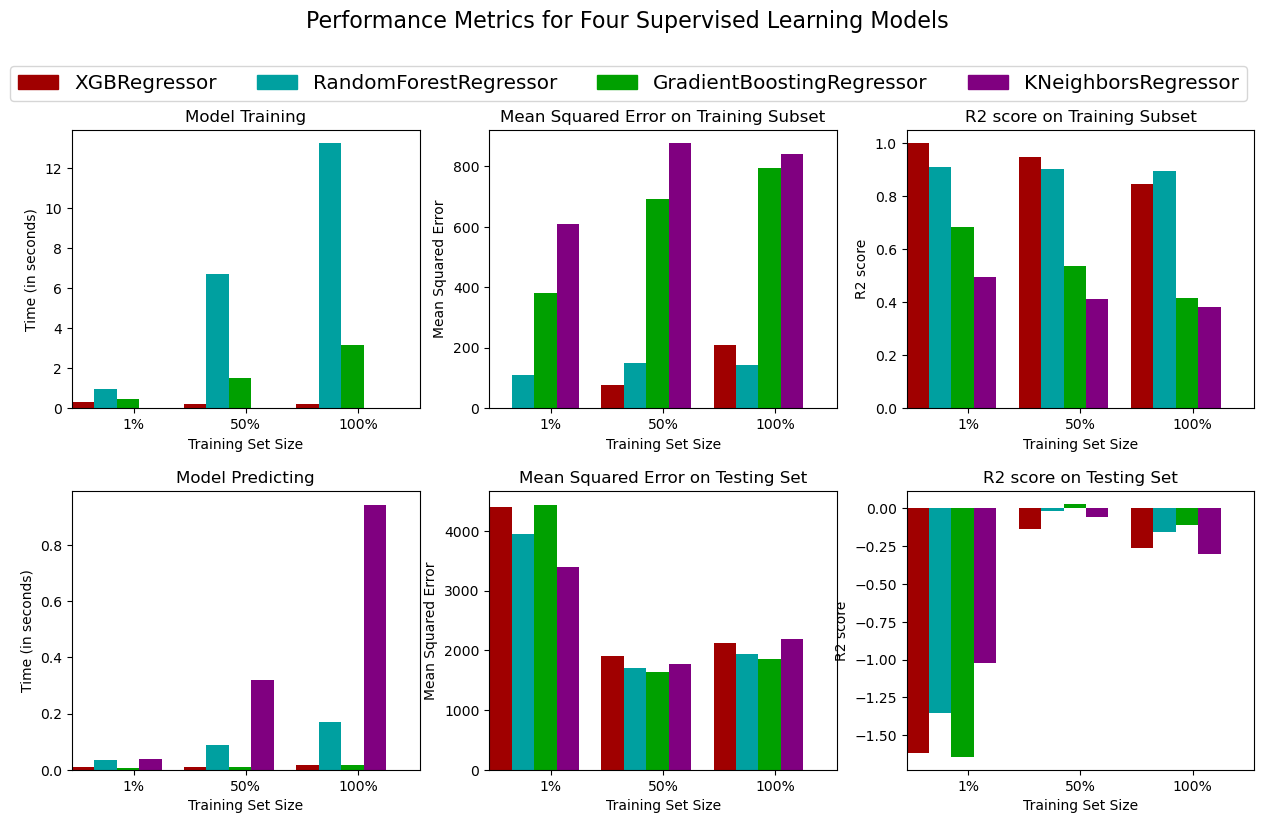

In [11]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize the four models
clf_A = XGBRegressor(random_state=42)
clf_B = RandomForestRegressor(random_state=42)
clf_C = GradientBoostingRegressor(random_state=42)
clf_D = KNeighborsRegressor()

# Calculate the number of samples for 1%, 50%, and 100% of the training data
samples_100 = len(y_train)
samples_50 = int(.5*len(y_train))
samples_1 = int(.1*len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

#### GradientBoostingRegressor has the best mean sqauared error and r2 score on the test sets. I also tried multiple other models but removed them from the visualization because it's too clunky. The ensemble models seem to work the best for this data.

----
# Parameters Optimization

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Parameters list to tune.
parameters = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [3, 5],  # Maximum depth of the individual trees
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the individual trees
}

# Make an mean_squared_error scoring object using make_scorer()
scorer = make_scorer(mean_squared_error)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(model,param_grid=parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_model = grid_fit.best_estimator_

# Get the best parameters
best_params = grid_fit.best_params_

# Make predictions using the unoptimized and model
predictions = (model.fit(X_train, y_train)).predict(X_test)
best_predictions = best_model.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Mean Squared Error on testing data: {:.4f}".format(mean_squared_error(y_test, predictions)))
print("R2 score on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final Mean Squared Error on the testing data: {:.4f}".format(mean_squared_error(y_test, best_predictions)))
print("Final R2 score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))
print("Best Parameters:", best_params)

Unoptimized model
------
Mean Squared Error on testing data: 1858.5036
R2 score on testing data: -0.1068

Optimized Model
------
Final Mean Squared Error on the testing data: 1975.6049
Final R2 score on the testing data: -0.1765
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


#### After trying multiple parameters, it seems the default parameters perform the best.

----
# Feature Selection

#### I'll be cutting down the number of features to achieve the lowest mean squared error and r2 score

In [13]:
from itertools import combinations

# Get the column names of features
feature_names = X_train.columns.tolist()

# Create a model
model = GradientBoostingRegressor(random_state=42)

# Initialize variables to store the results
results = []

# Default subset
default_subset = np.array(feature_names)  # You can modify this based on your default subset
model.fit(X_train[default_subset], y_train)
y_pred_default = model.predict(X_test[default_subset])
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)
results.append(("Default Subset", mse_default, r2_default))

# Iterate over all possible feature combinations of all sizes
for k in range(1, min(6, len(feature_names) + 1)):  # Limit to the top 5 subsets
    for subset_tuple in combinations(feature_names, k):
        subset = np.array(subset_tuple)
        model.fit(X_train[subset], y_train)
        y_pred = model.predict(X_test[subset])
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((subset, mse, r2))

# Create a DataFrame to store the results
columns = ["Subset", "Mean Squared Error", "R2 Score"]
df_results = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by MSE in ascending order
df_results = df_results.sort_values(by="Mean Squared Error").reset_index(drop=True)

# Display the default subset and the top 5 subsets with their corresponding scores
print("Default Subset:")
print("Subset:", default_subset)
print("MSE:", mse_default)
print("R2 Score:", r2_default)
print("\nTop 5 Subsets:")
pd.set_option('display.max_colwidth', None)
print(df_results.head(5))
pd.reset_option('display.max_colwidth')

Default Subset:
Subset: ['year' 'marketcap' 'eps' 'earnings_rate' 'price' 'price_rate' 'pe_ratio'
 'roe' 'sh_equity' 'sh_return']
MSE: 1858.5036406378028
R2 Score: -0.1068098635048027

Top 5 Subsets:
                                 Subset  Mean Squared Error  R2 Score
0          [marketcap, price_rate, roe]         1611.252194  0.040438
1      [marketcap, eps, roe, sh_return]         1615.379565  0.037980
2  [marketcap, earnings_rate, pe_ratio]         1615.493830  0.037912
3       [marketcap, eps, earnings_rate]         1616.247902  0.037463
4  [marketcap, eps, earnings_rate, roe]         1618.283618  0.036250


#### The default subset is ['year' 'marketcap' 'eps' 'earnings_rate' 'price' 'price_rate' 'pe_ratio'  'roe' 'sh_equity' 'sh_return'.] It has a MSE of 1858.5036406378028 and a R2 score of -0.1068098635048027.

#### The best subset is [marketcap, price_rate, roe]. It has a MSE of 1611.252194 and a R2 score of 0.040438.

In [72]:
# setting subset to the best
subset = ['marketcap', 'price_rate', 'roe']
# changing the numerical data to be scaled
numerical = ['marketcap', 'price_rate', 'roe']

----
# Testing Model MSE vs Dummy Regressor

In [15]:
from sklearn.dummy import DummyRegressor

# Create a DummyRegressor that predicts the mean of the target variable
dummy_regressor = DummyRegressor(strategy="mean")

# Fit the DummyRegressor
dummy_regressor.fit(X_train[subset], y_train)

# Make predictions
dummy_predictions = dummy_regressor.predict(X_test[subset])

# Evaluate the performance using Mean Squared Error
dummy_mse = mean_squared_error(y_test, dummy_predictions)

print(f"Dummy Regressor MSE: {dummy_mse}")

Dummy Regressor MSE: 1733.1784119114209


The model's MSE is 1611.252194

The dummy regressor's MSE is 1733.1784119114209

The model outperforms the dummy regressor.

----
# Seeing how correlated models predictions are to the real percent change

In [103]:
pred_vs_returns = {'-30:-20': 0, '-20:-10': 0, '-10:0': 0, '0:10': 0, '10:20': 0, '20:30': 0, '30:40': 0, '40:50': 0, '50:60': 0, '60:70': 0, '70:80': 0, '80:': 0}

model = GradientBoostingRegressor(random_state=42)
model = model.fit(X_train[subset],y_train)
preds = model.predict(X_test[subset])
returns = y_test

# Calculate the minimum and maximum values
min_pred = np.min(preds)
max_pred = np.max(preds)

print("Minimum Prediction:", round(min_pred,2))
print("Maximum Prediction:", round(max_pred,2))

for key, value in pred_vs_returns.items():
    if ':' in key:
        start, end = key.split(':')
        start = float(start) if start else None
        end = float(end) if end else None

        condition = np.ones(len(preds), dtype=bool)

        if start is not None:
            condition = condition & (preds >= start)
        if end is not None:
            condition = condition & (preds < end)

        # Calculate the average return for the specified range
        average_return = np.mean(returns[condition])

        pred_vs_returns[key] = round(average_return,2)

print(pred_vs_returns)

Minimum Prediction: -26.94
Maximum Prediction: 81.78
{'-30:-20': -50.27, '-20:-10': -8.1, '-10:0': nan, '0:10': 0.58, '10:20': 9.87, '20:30': 28.1, '30:40': 20.07, '40:50': 118.75, '50:60': 22.72, '60:70': nan, '70:80': nan, '80:': 349.75}


#### The model does generally predict the trend of the real return

----
#### Visualizing the correlation trend

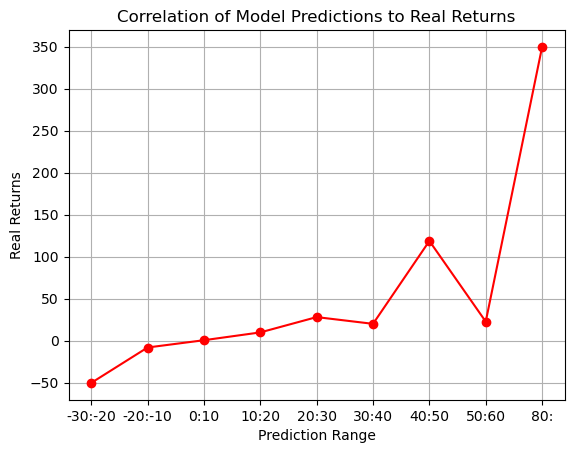

In [104]:
import matplotlib.pyplot as plt

# Convert dictionary keys and values to lists
keys = list(pred_vs_returns.keys())
values = list(pred_vs_returns.values())

# Remove NaN values for plotting (optional, depending on your preference)
keys = [key for key, value in zip(keys, values) if not np.isnan(value)]
values = [value for value in values if not np.isnan(value)]

# Plotting
plt.plot(keys, values, color='red', marker='o', linestyle='-')

plt.xlabel('Prediction Range')
plt.ylabel('Real Returns')
plt.title('Correlation of Model Predictions to Real Returns')
plt.grid()
plt.show()

----
# Testing Model ROI

#### Function that tests a certain year

In [120]:
def test_year_returns(model, test_df2, test_df_real_change_raw, ticker_column, subset): 
    '''
    description:
        - model predicts which stock will perform the best the next year. 
          It returns the actual performance of the stock the following year.
    inputs:
       - model: the model to be trained and predicted on
       - test_df2: df of the year to make a prediction for the following year
       - test_df_real_change_raw: actual roi of the following year
       - ticker_column: df of stock ticker names
       - subset: features that perform the best

    output:
        - best_pred which contains the stock ticker, models roi prediction and the real change
    '''
    sample_data = pd.DataFrame(test_df2.iloc[0]).transpose()
    best_pred = [round(model.predict(sample_data[subset])[0],2), ticker_column.iloc[0], test_df_real_change_raw.iloc[0]]
    i = 0
    while i < len(test_df2):
        sample_data = pd.DataFrame(test_df2.iloc[i]).transpose()
        roi_pred = round(model.predict(sample_data[subset])[0],2)
        if roi_pred > best_pred[0]:
            ticker = ticker_column.iloc[i]
            roi_real = test_df_real_change_raw.iloc[i]
            best_pred = [roi_pred, ticker, roi_real]
        i = i + 1
        
    return best_pred

#### Loop that will test the model for a range of years

In [127]:
# Dictionary of SPY yearly returns
spy_yearly_return = {"2023": 26.19, "2022": -18.17, "2021": 28.75, "2020": 18.37, "2019": 31.22, "2018": -4.56, "2017": 21.7, 
                     "2016": 12.0, "2015": 1.25, "2014": 13.46,  "2013": 32.31, "2012": 15.99,  "2011": 1.89
}

# Configuring loop
years_to_predict = 10

model = GradientBoostingRegressor(random_state=42)
model_yearly_return = {}
i = 0

while i < years_to_predict:
    years = list(spy_yearly_return.keys())
    predict_year = years[i]
    year_before = years[i+1]

    # Convert the keys to integers for comparison
    year_before_int = int(year_before)
    
    # getting dataframe of only the test rows
    test_df = df[df['year'] == year_before_int]
    
    # Drop the rows where the 'year' column is greater than or equal to the year_before
    df4 = df[df['year'] < year_before_int]
    
    # Save the column before dropping it
    ticker_column = test_df['ticker'].copy()

    # Sort by year
    df4 = df4.sort_values(by='year')
    
    # Dropping the ticker column
    df4 = df4.drop('ticker', axis=1)
    test_df = test_df.drop('ticker', axis=1)

    # scales data
    scaler = StandardScaler()
    real_change_raw = df4['real_change']
    features_raw = df4.drop('real_change', axis = 1)
    df4[numerical] = scaler.fit_transform(features_raw[numerical])

    test_df_real_change_raw = test_df['real_change']
    test_df_features_raw = test_df.drop('real_change', axis = 1)
    test_df[numerical] = scaler.transform(test_df_features_raw[numerical])
    
    # Separate features and target variables
    X_train = df4
    y_train = real_change_raw

    # Get the minimum and maximum values of 'your_column'
    min_year_train = X_train['year'].min()
    max_year_train = X_train['year'].max()
    year_test = test_df['year'].iloc[0]

    # Show the results of the split
    print("Training set has {} samples. Years between {} - {}".format(X_train.shape[0],min_year_train,max_year_train))
    print("Testing set has {} samples. Year is {} predicting {}\n".format(test_df.shape[0],year_test,predict_year))

    # fit model
    model = model.fit(X_train[subset],y_train)
    
    # gets the model's ROI for a year
    model_return = test_year_returns(model, test_df, test_df_real_change_raw, ticker_column, subset)

    # adds the yearly return to the dictionary
    model_yearly_return[predict_year] = model_return

    i = i + 1

model_yearly_return

Training set has 8886 samples. Years between 2001 - 2021
Testing set has 705 samples. Year is 2022 predicting 2023

Training set has 8202 samples. Years between 2001 - 2020
Testing set has 684 samples. Year is 2021 predicting 2022

Training set has 7534 samples. Years between 2001 - 2019
Testing set has 668 samples. Year is 2020 predicting 2021

Training set has 6885 samples. Years between 2001 - 2018
Testing set has 649 samples. Year is 2019 predicting 2020

Training set has 6249 samples. Years between 2001 - 2017
Testing set has 636 samples. Year is 2018 predicting 2019

Training set has 5621 samples. Years between 2001 - 2016
Testing set has 628 samples. Year is 2017 predicting 2018

Training set has 5010 samples. Years between 2001 - 2015
Testing set has 611 samples. Year is 2016 predicting 2017

Training set has 4415 samples. Years between 2001 - 2014
Testing set has 595 samples. Year is 2015 predicting 2016

Training set has 3849 samples. Years between 2001 - 2013
Testing set has

{'2023': [78.94, 'MSTR', 349.75],
 '2022': [64.6, 'WYNN', -4.99],
 '2021': [75.76, 'APA', 84.33],
 '2020': [189.0, 'CYTK', 109.34],
 '2019': [140.68, 'DB', -4.95],
 '2018': [132.3, 'TPX', -34.2],
 '2017': [88.28, 'UBS', 17.36],
 '2016': [103.59, 'OVV', 145.03],
 '2015': [148.48, 'WYNN', -53.39],
 '2014': [61.37, 'SRPT', -33.64]}

----
# Comparing Model ROI vs SPY ROI

In [129]:
model_years = []

model_test_money = 100
spy_test_money = 100
model_test_start_money = model_test_money
spy_test_start_money = spy_test_money

model_money_yearly = []
spy_money_yearly = []

model_percent_yearly = []
spy_percent_yearly = []

for year, values in model_yearly_return.items():
    model_years.insert(0,year)
    model_percent_yearly.insert(0,values[2])
    if str(year) in spy_yearly_return:
        spy_percent_yearly.insert(0,spy_yearly_return[str(year)])

i = 0
while i < len(model_percent_yearly):
    model_test_money = model_test_money + (model_test_money*(model_percent_yearly[i]/100))
    spy_test_money = spy_test_money + (spy_test_money*(spy_percent_yearly[i]/100))
    model_money_yearly.append(round(model_test_money,2))
    spy_money_yearly.append(round(spy_test_money,2))
    i = i + 1

print("Years:",model_years)
print("\n")
print("Model Percent Change per Year",model_percent_yearly)
print("SPY Percent Change per Year",spy_percent_yearly)
print("\n")
print("Model Money per Year",model_money_yearly)
print("SPY Money per Year",spy_money_yearly)
print("\n")
print("Total Model ROI Over Time Period:",str(round(((model_test_money-model_test_start_money)/model_test_start_money)*100,2))+"%")
print("Total SPY ROI Over Time Period",str(round(((spy_test_money-spy_test_start_money)/spy_test_start_money)*100,2))+"%")

Years: ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


Model Percent Change per Year [-33.64, -53.39, 145.03, 17.36, -34.2, -4.95, 109.34, 84.33, -4.99, 349.75]
SPY Percent Change per Year [13.46, 1.25, 12.0, 21.7, -4.56, 31.22, 18.37, 28.75, -18.17, 26.19]


Model Money per Year [66.36, 30.93, 75.79, 88.95, 58.53, 55.63, 116.45, 214.66, 203.95, 917.26]
SPY Money per Year [113.46, 114.88, 128.66, 156.58, 149.44, 196.1, 232.12, 298.86, 244.56, 308.61]


Total Model ROI Over Time Period: 817.26%
Total SPY ROI Over Time Period 208.61%


#### Visualizing Comparison by Year

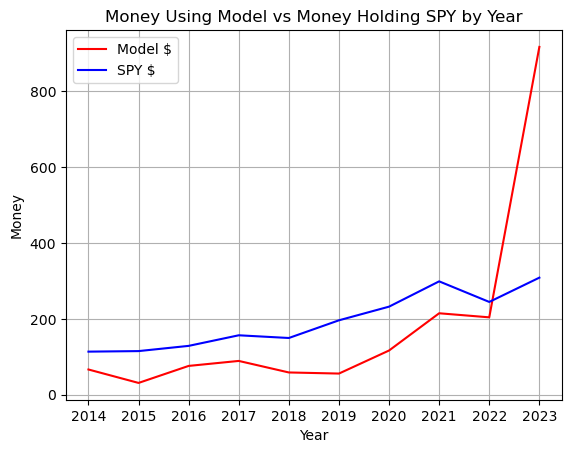

In [130]:
plt.plot(model_years, model_money_yearly, color='red', label='Model $')
plt.plot(model_years, spy_money_yearly, color='blue', label='SPY $')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Money')
plt.title('Money Using Model vs Money Holding SPY by Year')
plt.grid()
plt.show()

#### Most of the time the model performed worse than SPY. It did manage to beat it in the end but it seems like it was just luck.

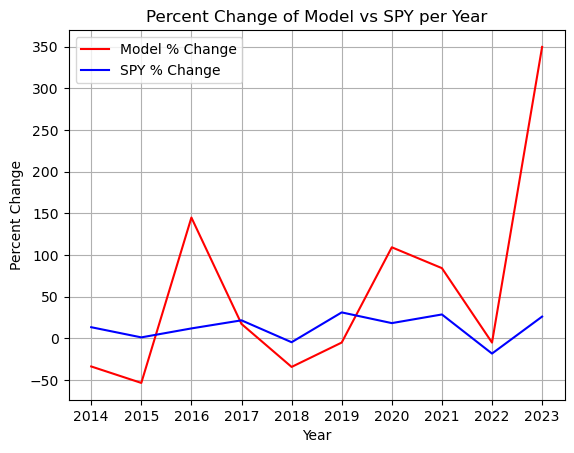

In [131]:
plt.plot(model_years, model_percent_yearly, color='red', label='Model % Change')
plt.plot(model_years, spy_percent_yearly, color='blue', label='SPY % Change')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Percent Change of Model vs SPY per Year')
plt.grid()
plt.show()

#### Managed to beat the market 5 out of 10 years